In [129]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import itertools as it
import statistics
sns.set_theme(style="whitegrid")
os.chdir('/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

## Load Spreadsheets

In [2]:
human = pd.read_csv('results/samplesheets/hicpro/current.hicpro.samplesheet.without_header.tsv', sep='\t', header=None)
mouse = pd.read_csv('results/samplesheets/hicpro/current.mouse.hicpro.samplesheet.without_header.tsv', sep='\t', header=None)

In [3]:
human = human.drop(columns=[2,3,4,5,6])
mouse = mouse.drop(columns=[2,3,4,5,6])

cols = ['sample_name', 'col']
human.columns = cols
mouse.columns = cols

human = human.sort_values(by='sample_name')
mouse = mouse.sort_values(by='sample_name')

In [4]:
def get_combos(samples):
    s = samples

    # create a pairwise combination of samples 
    combos = list(it.product(s, s))

    # remove self versus self
    combos  = [list(x) for x in combos if x[0] != x[1] and x[0] < x[1]]
    
    return combos

## Human

In [5]:
samples = []
final = {}
idx = 0
for index in human.index:
    if len(samples) == 0 or human['sample_name'][index].split('.b')[0] in samples[0]:
        samples.append(human['sample_name'][index])
    else:
        final[idx] = samples
        idx = idx + 1
        samples = []
        samples.append(human['sample_name'][index])

df = pd.DataFrame.from_dict(final, orient='index')

In [6]:
df

,0,1,2,3,4
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,None,None,None,None
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,None,None,None,None
2,293T.GSE128106.Homo_Sapiens.YY1.b1,None,None,None,None
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,None,None,None
4,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,None,None,None
5,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,None,None,None
6,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2,None,None,None
7,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b1,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b2,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b3,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b4,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b5
8,A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac.b1,A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac.b2,A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac.b3,None,None
9,A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b1,A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b2,A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b3,None,None


In [7]:
filter = [i for i in df[1].to_list() if i is not None]
len(filter)

113

In [8]:
hicrep_combos = {}
idx = 0
for row, index in df.iterrows():
    samples = [i for i in index.to_list() if i is not None]
    combos = get_combos(samples)
    for combo in combos:
        combo.append(combo[0].split('.b')[0])
        hicrep_combos[idx] = combo
        idx = idx + 1
human_hicrep_df = pd.DataFrame.from_dict(hicrep_combos, orient='index')

In [9]:
human_hicrep_df = human_hicrep_df.sort_values(by=[0,1])

In [10]:
len(human_hicrep_df)

281

In [11]:
human_hicrep_df

,0,1,2
0,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF
1,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF
2,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF
3,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF
4,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b1,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b2,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF
5,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b1,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b3,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF
6,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b1,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b4,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF
7,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b1,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b5,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF
8,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b2,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b3,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF
9,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b2,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b4,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF


## Mouse

In [12]:
samples = []
final = {}
idx = 0
for index in mouse.index:
    if len(samples) == 0 or mouse['sample_name'][index].split('.b')[0] in samples[0]:
        samples.append(mouse['sample_name'][index])
    else:
        final[idx] = samples
        idx = idx + 1
        samples = []
        samples.append(mouse['sample_name'][index])

df = pd.DataFrame.from_dict(final, orient='index')

In [13]:
df

,0,1,2,3
0,3134_WT.GSE162617.Mus_Musculus.GR.b1,None,None,None
1,3134_siCTRL_1hr_Dex.GSE162617.Mus_Musculus.GR.b1,None,None,None
2,3134_siNIPBL_1hr_Dex.GSE162617.Mus_Musculus.GR.b1,None,None,None
3,3T3.GSE192387.Mus_Musculus.BATF.b1,None,None,None
4,3T3.GSE192387.Mus_Musculus.CTCF.b1,None,None,None
5,3T3_Irf4.GSE192387.Mus_Musculus.BATF.b1,None,None,None
6,3T3_Irf4_Runx3_Tbet.GSE192387.Mus_Musculus.BATF.b1,None,None,None
7,3T3_Norm.GSE178344.Mus_Musculus.SMC1A.b1,None,None,None
8,3T3_TCF1.GSE178344.Mus_Musculus.SMC1A.b1,None,None,None
9,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3.b1,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3.b2,None,None


In [14]:
filter = [i for i in df[1].to_list() if i is not None]
len(filter)

73

In [15]:
hicrep_combos = {}
idx = 0
for row, index in df.iterrows():
    samples = [i for i in index.to_list() if i is not None]
    combos = get_combos(samples)
    for combo in combos:
        combo.append(combo[0].split('.b')[0])
        hicrep_combos[idx] = combo
        idx = idx + 1
mouse_hicrep_df = pd.DataFrame.from_dict(hicrep_combos, orient='index')

In [16]:
mouse_hicrep_df = mouse_hicrep_df.sort_values(by=[0,1])

In [17]:
len(mouse_hicrep_df)

107

In [18]:
mouse_hicrep_df

,0,1,2
0,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3.b1,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3.b2,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3
1,AML12_shSafb.GSE141113.Mus_Musculus.H3K9me3.b1,AML12_shSafb.GSE141113.Mus_Musculus.H3K9me3.b2,AML12_shSafb.GSE141113.Mus_Musculus.H3K9me3
2,Adult_CTX_SSTcre.GSE150536.Mus_Musculus.H3K27ac.b1,Adult_CTX_SSTcre.GSE150536.Mus_Musculus.H3K27ac.b2,Adult_CTX_SSTcre.GSE150536.Mus_Musculus.H3K27ac
3,Adult_CTX_VIPcre.GSE150536.Mus_Musculus.H3K27ac.b1,Adult_CTX_VIPcre.GSE150536.Mus_Musculus.H3K27ac.b2,Adult_CTX_VIPcre.GSE150536.Mus_Musculus.H3K27ac
4,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac.b1,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac.b2,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac
5,BL6_CD4_CD8.GSE141847.Mus_Musculus.SMC1A.b1,BL6_CD4_CD8.GSE141847.Mus_Musculus.SMC1A.b2,BL6_CD4_CD8.GSE141847.Mus_Musculus.SMC1A
6,BMDM_24hIL4.GSE159629.Mus_Musculus.H3K4me3.b1,BMDM_24hIL4.GSE159629.Mus_Musculus.H3K4me3.b2,BMDM_24hIL4.GSE159629.Mus_Musculus.H3K4me3
7,BMDM_Basal.GSE159629.Mus_Musculus.H3K4me3.b1,BMDM_Basal.GSE159629.Mus_Musculus.H3K4me3.b2,BMDM_Basal.GSE159629.Mus_Musculus.H3K4me3
8,BMDM_EPSKO.GSE115524.Mus_Musculus.H3K4me3.b1,BMDM_EPSKO.GSE115524.Mus_Musculus.H3K4me3.b2,BMDM_EPSKO.GSE115524.Mus_Musculus.H3K4me3
9,BMDM_EPSKO.GSE115524.Mus_Musculus.SMC1A.b1,BMDM_EPSKO.GSE115524.Mus_Musculus.SMC1A.b2,BMDM_EPSKO.GSE115524.Mus_Musculus.SMC1A


## Convert to TSV

In [19]:
without_header_output = '{}.without_header.tsv'.format('results/samplesheets/post-hicpro/human_hicrep_04_27_23.samplesheet')
human_hicrep_df.to_csv(without_header_output, header=False, index=False, sep='\t')

In [20]:
without_header_output = '{}.without_header.tsv'.format('results/samplesheets/post-hicpro/mouse_hicrep_04_27_23.samplesheet')
mouse_hicrep_df.to_csv(without_header_output, header=False, index=False, sep='\t')

## Analysis

#### Htrain

In [259]:
paths = glob.glob('results/qc/hicrep/htrain/*Mus*.txt')

In [260]:
data = []
for file in paths:
    sample_info = []
    sample = file.strip().split("/")[4].split("_b")[0]
    sample_info.append(sample)
    if os.path.exists(file):
        with open(file) as f:
            h = int(str(f.readline().strip()))
            sample_info.append(h)
    data.append(sample_info)

In [261]:
df_mouse = pd.DataFrame(data).sort_values(by=0).reset_index(drop=True)
df_mouse.columns = ["sample", "h_value"]
df_mouse = df_mouse.groupby(["sample"]).agg({"h_value" : pd.Series}).reset_index()
df_mouse["h_value"] = df_mouse.apply(lambda x : int(np.median(x["h_value"])), axis = 1)

In [262]:
df_mouse

,sample,h_value
0,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3,11
1,AML12_shSafb.GSE141113.Mus_Musculus.H3K9me3,10
2,Adult_CTX_SSTcre.GSE150536.Mus_Musculus.H3K27ac,8
3,Adult_CTX_VIPcre.GSE150536.Mus_Musculus.H3K27ac,8
4,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac,9
5,BL6_CD4_CD8.GSE141847.Mus_Musculus.SMC1A,9
6,BMDM_24hIL4.GSE159629.Mus_Musculus.H3K4me3,9
7,BMDM_Basal.GSE159629.Mus_Musculus.H3K4me3,10
8,BMDM_EPSKO.GSE115524.Mus_Musculus.H3K4me3,3
9,BMDM_EPSKO.GSE115524.Mus_Musculus.SMC1A,8


In [263]:
df_human = pd.DataFrame(data).sort_values(by=0).reset_index(drop=True)
df_human.columns = ["sample", "h_value"]
df_human = df_human.groupby(["sample"]).agg({"h_value" : pd.Series}).reset_index()
df_human["h_value"] = df_human.apply(lambda x : int(np.median(x["h_value"])), axis = 1)

In [264]:
df_human

,sample,h_value
0,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3,11
1,AML12_shSafb.GSE141113.Mus_Musculus.H3K9me3,10
2,Adult_CTX_SSTcre.GSE150536.Mus_Musculus.H3K27ac,8
3,Adult_CTX_VIPcre.GSE150536.Mus_Musculus.H3K27ac,8
4,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac,9
5,BL6_CD4_CD8.GSE141847.Mus_Musculus.SMC1A,9
6,BMDM_24hIL4.GSE159629.Mus_Musculus.H3K4me3,9
7,BMDM_Basal.GSE159629.Mus_Musculus.H3K4me3,10
8,BMDM_EPSKO.GSE115524.Mus_Musculus.H3K4me3,3
9,BMDM_EPSKO.GSE115524.Mus_Musculus.SMC1A,8


In [265]:
df_mouse.to_csv("results/samplesheets/post-hicpro/mouse_hicrep_htrain_050723.txt", sep="\t", header=None, index=False)

#### SCC

In [272]:
samples = glob.glob('results/qc/hicrep/scc/*Homo*/')

In [273]:
data = []
for s in samples:
    sample_info = []
    sample = s.strip().split("/")[4]
    sample_info.append(sample)
    files = glob.glob('results/qc/hicrep/scc/{sam}/*.txt'.format(sam = sample))
    sccs = []
    for file in files:
        if os.path.exists(file):
            with open(file) as f:
                scc = float(str(f.readline().strip()))
                sccs.append(scc)
    sample_info.append(sccs)
    data.append(sample_info)

In [274]:
df = pd.DataFrame(data).sort_values(by=0).reset_index(drop=True)
df[1] = df.apply(lambda x : np.median(x[1]), axis = 1)

In [275]:
df

,0,1
0,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF,0.981721
1,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF,0.980826
2,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF,0.979625
3,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF,0.981890
4,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF,0.933678
5,A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac,0.853178
6,A673_SA2r.GSE133227.Homo_Sapiens.CTCF,0.981849
7,A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac,0.983980
8,A673_WT.GSE133227.Homo_Sapiens.CTCF,0.970319
9,A673_WT.GSE133227.Homo_Sapiens.H3K27ac,0.954133


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


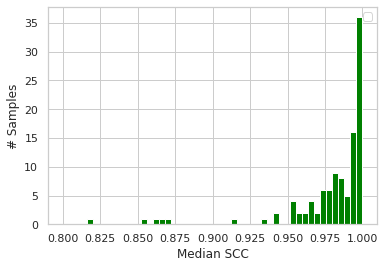

In [276]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(121)
ax.hist(df[1], color="green", bins = 50, range = (0.80, 1.0))
ax.set_xlabel("Median SCC")
ax.set_ylabel("# Samples")
ax.legend();

In [277]:
df.loc[df[1] < 0.8]

,0,1
24,CTL.GSE117888.Homo_Sapiens.H3K27ac,0.017032
26,DEX.GSE117888.Homo_Sapiens.H3K27ac,0.518550
28,DND41-Resistant.GSE173871.Homo_Sapiens.SMC1A,0.471332
35,Hela-S3-Control.GSE108869.Homo_Sapiens.CTCF,0.741063


In [278]:
df.describe()

,1
count,113.000000
mean,0.959297
std,0.116470
min,0.017032
25%,0.973988
50%,0.988106
75%,0.996551
max,0.998510


In [253]:
files = glob.glob('results/qc/hicrep/scc/*Mus*/*.txt')

In [254]:
data = []
for f in files:
    sample_info = []
    sample = f.strip().split("/")[4] + "_" + f.strip().split("/")[5].split(".")[0].split("5_")[1]
    sample_info.append(sample)
    if os.path.exists(f):
        with open(f) as fx:
            scc = float(str(fx.readline().strip()))
            sample_info.append(scc)
    data.append(sample_info)

In [255]:
df = pd.DataFrame(data).sort_values(by=0).reset_index(drop=True)
df

,0,1
0,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3_b1_b2,0.979523
1,AML12_shSafb.GSE141113.Mus_Musculus.H3K9me3_b1_b2,0.990967
2,Adult_CTX_SSTcre.GSE150536.Mus_Musculus.H3K27ac_b1_b2,0.989520
3,Adult_CTX_VIPcre.GSE150536.Mus_Musculus.H3K27ac_b1_b2,0.993166
4,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac_b1_b2,0.928875
5,BL6_CD4_CD8.GSE141847.Mus_Musculus.SMC1A_b1_b2,0.984744
6,BMDM_24hIL4.GSE159629.Mus_Musculus.H3K4me3_b1_b2,0.871305
7,BMDM_Basal.GSE159629.Mus_Musculus.H3K4me3_b1_b2,0.849112
8,BMDM_EPSKO.GSE115524.Mus_Musculus.H3K4me3_b1_b2,0.996539
9,BMDM_EPSKO.GSE115524.Mus_Musculus.SMC1A_b1_b2,0.990450


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


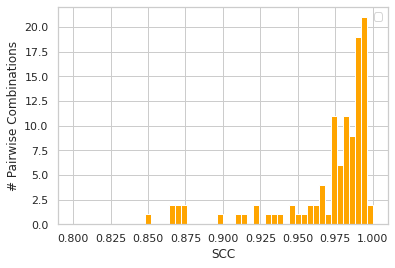

In [256]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(121)
ax.hist(df[1], color="orange", bins = 50, range = (0.80, 1.0))
ax.set_xlabel("SCC")
ax.set_ylabel("# Pairwise Combinations")
ax.legend();

In [257]:
df.loc[df[1] < 0.80]

,0,1


In [258]:
df.describe()

,1
count,107.000000
mean,0.970512
std,0.034076
min,0.849112
25%,0.968654
50%,0.982564
75%,0.990760
max,0.996539


[Text(0.5, 0, 'SCC Value'),
 Text(0, 0.5, 'Number of Samples'),
 Text(0.5, 1.0, 'Distribution of Median Sample SCC, chr1 only')]

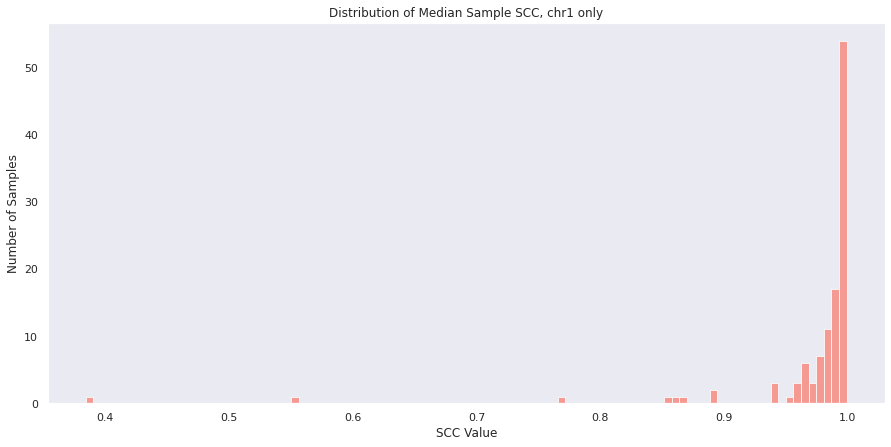

In [22]:
sns.set(rc = {'figure.figsize':(15,7)})
sns.set_theme(style="dark")
palette = [
'#fa8072',
'#90AACB',
'#9F5F80']
sns.set_palette(palette)
ax = sns.histplot(x="chr1_median", data=df, bins=100)
ax.set(xlabel='SCC Value', ylabel='Number of Samples', title='Distribution of Median Sample SCC, chr1 only')

[Text(0.5, 0, 'SCC Value'),
 Text(0, 0.5, 'Number of Samples'),
 Text(0.5, 1.0, 'Distribution of Mean Sample SCC, chr1 only')]

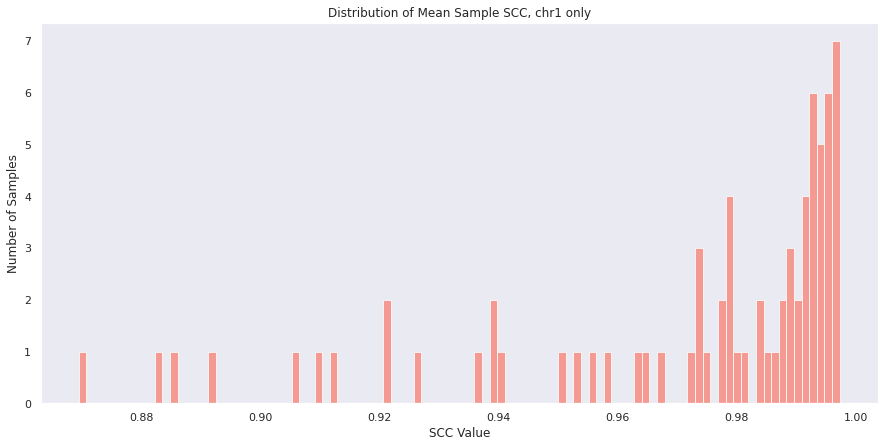

In [168]:
ax = sns.histplot(x="chr1_mean", data=df, bins=100)
ax.set(xlabel='SCC Value', ylabel='Number of Samples', title='Distribution of Mean Sample SCC, chr1 only')

[Text(0.5, 0, 'SCC Value'),
 Text(0, 0.5, 'Number of Samples'),
 Text(0.5, 1.0, 'Distribution of Median Sample SCC, chr10 only')]

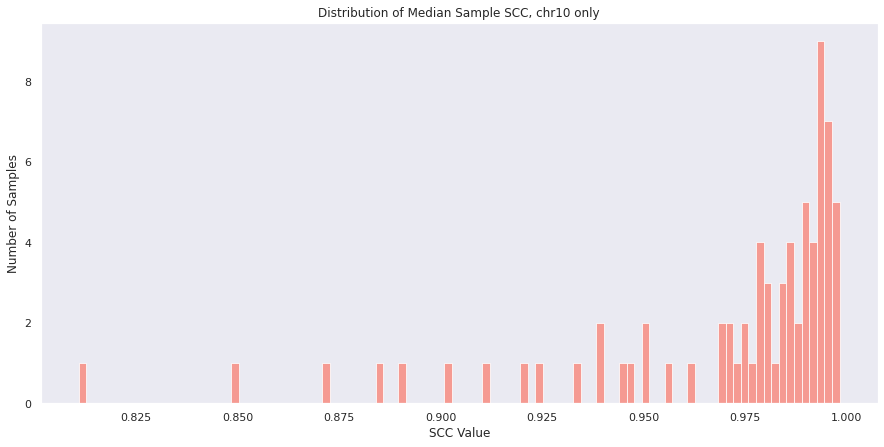

In [169]:
ax = sns.histplot(x="chr10_median", data=df, bins=100)
ax.set(xlabel='SCC Value', ylabel='Number of Samples', title='Distribution of Median Sample SCC, chr10 only')

[Text(0.5, 0, 'SCC Value'),
 Text(0, 0.5, 'Number of Samples'),
 Text(0.5, 1.0, 'Distribution of Mean Sample SCC, chr10 only')]

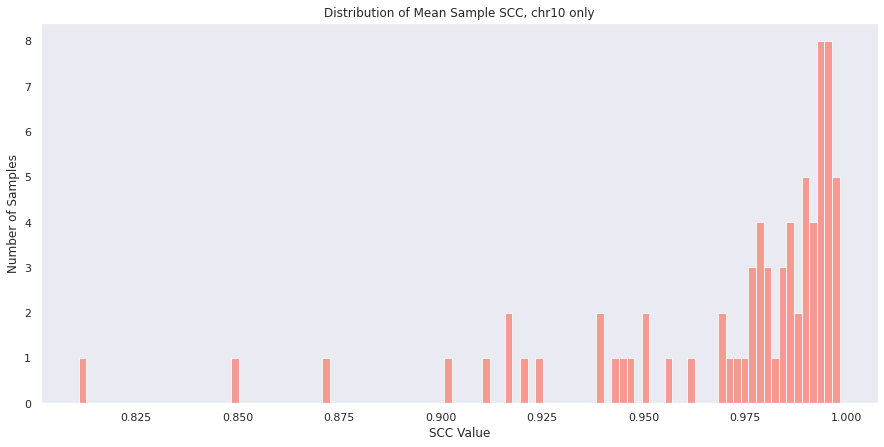

In [170]:
ax = sns.histplot(x="chr10_mean", data=df, bins=100)
ax.set(xlabel='SCC Value', ylabel='Number of Samples', title='Distribution of Mean Sample SCC, chr10 only')

[Text(0.5, 0, 'SCC Value'),
 Text(0, 0.5, 'Number of Samples'),
 Text(0.5, 1.0, 'Distribution of Median Sample SCC, chr17 only')]

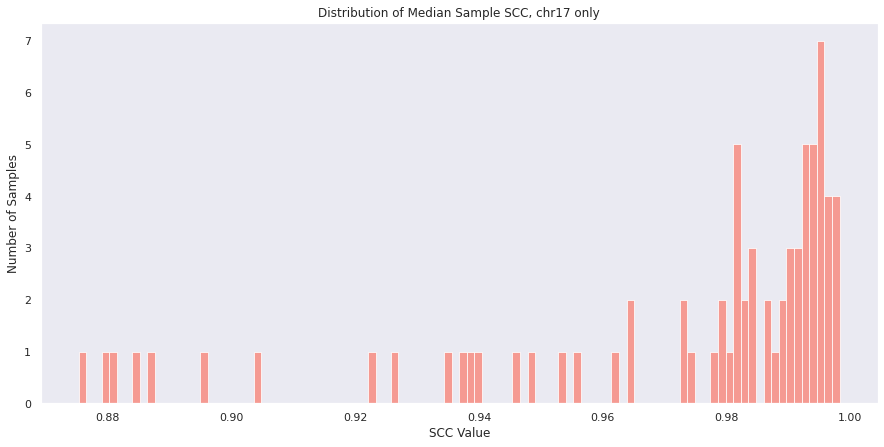

In [171]:
ax = sns.histplot(x="chr17_median", data=df, bins=100)
ax.set(xlabel='SCC Value', ylabel='Number of Samples', title='Distribution of Median Sample SCC, chr17 only')

[Text(0.5, 0, 'SCC Value'),
 Text(0, 0.5, 'Number of Samples'),
 Text(0.5, 1.0, 'Distribution of Mean Sample SCC, chr17 only')]

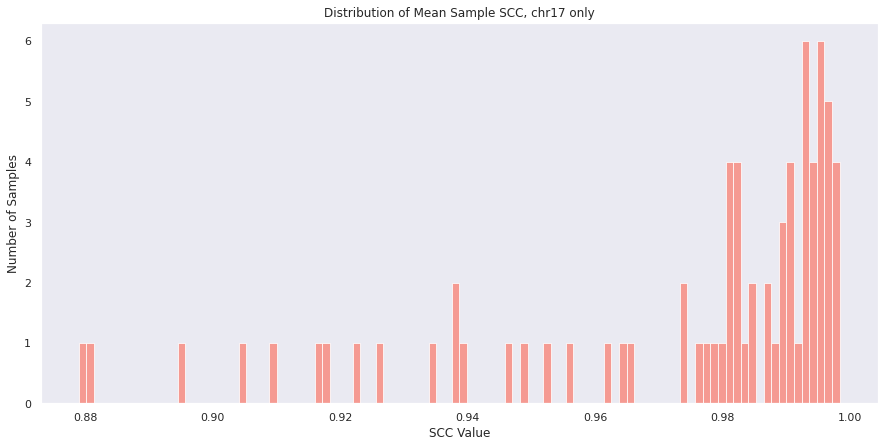

In [172]:
ax = sns.histplot(x="chr17_mean", data=df, bins=100)
ax.set(xlabel='SCC Value', ylabel='Number of Samples', title='Distribution of Mean Sample SCC, chr17 only')

[Text(0.5, 0, 'SCC Value'),
 Text(0, 0.5, 'Number of Samples'),
 Text(0.5, 1.0, 'Distribution of Median Sample SCC, chr19 only')]

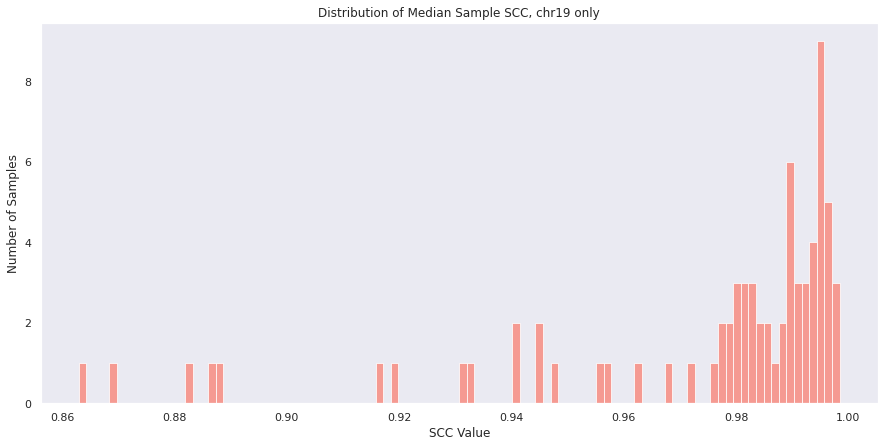

In [173]:
ax = sns.histplot(x="chr19_median", data=df, bins=100)
ax.set(xlabel='SCC Value', ylabel='Number of Samples', title='Distribution of Median Sample SCC, chr19 only')

[Text(0.5, 0, 'SCC Value'),
 Text(0, 0.5, 'Number of Samples'),
 Text(0.5, 1.0, 'Distribution of Mean Sample SCC, chr19 only')]

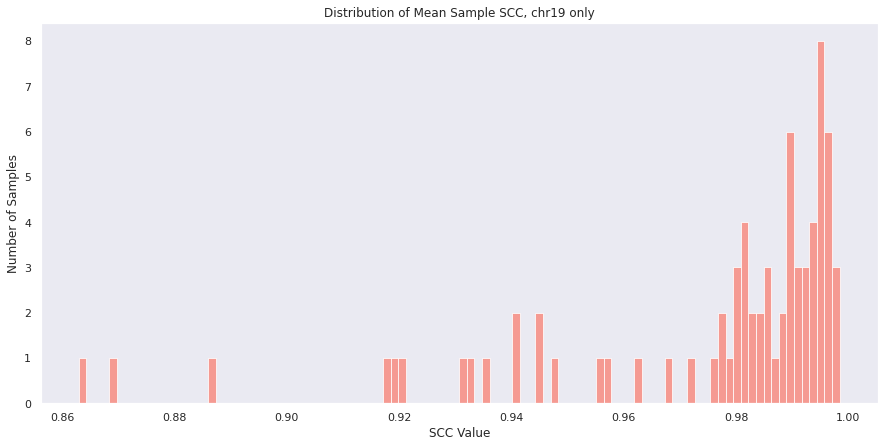

In [174]:
ax = sns.histplot(x="chr19_mean", data=df, bins=100)
ax.set(xlabel='SCC Value', ylabel='Number of Samples', title='Distribution of Mean Sample SCC, chr19 only')

## Threshold Analysis: Human (>0.90 SCC, all chrs)

In [143]:
df

,sample,chr1_median,chr1_mean,chr10_median,chr10_mean,chr17_median,chr17_mean,chr19_median,chr19_mean,all_chrs_mean
0,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF,0.988821,0.988821,0.978277,0.978277,0.987981,0.987981,0.990451,0.990451,0.986383
1,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF,0.988263,0.988263,0.970175,0.970175,0.985987,0.985987,0.990102,0.990102,0.983632
2,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF,0.988473,0.988473,0.965846,0.965846,0.984236,0.984236,0.984464,0.984464,0.980755
3,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF,0.986224,0.986224,0.982258,0.982258,0.984357,0.984357,0.987230,0.987230,0.985017
4,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF,0.940878,0.932689,0.917366,0.895098,0.951074,0.930590,0.963788,0.948206,0.926646
5,A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac,0.890126,0.888706,0.785688,0.802164,0.861977,0.866225,0.871185,0.883002,0.860024
6,A673_SA2r.GSE133227.Homo_Sapiens.CTCF,0.986031,0.988461,0.978044,0.981232,0.986371,0.988279,0.990405,0.990412,0.987096
7,A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac,0.986503,0.987777,0.982592,0.984072,0.987374,0.988044,0.988132,0.989369,0.987315
8,A673_WT.GSE133227.Homo_Sapiens.CTCF,0.975287,0.975459,0.963540,0.959171,0.974506,0.973845,0.982547,0.979633,0.972027
9,A673_WT.GSE133227.Homo_Sapiens.H3K27ac,0.960996,0.952692,0.956738,0.947700,0.958151,0.950475,0.970360,0.967824,0.954673


In [150]:
len(df)

113

In [148]:
pass_thres = df[df['all_chrs_mean'] > .9]

In [149]:
pass_thres

,sample,chr1_median,chr1_mean,chr10_median,chr10_mean,chr17_median,chr17_mean,chr19_median,chr19_mean,all_chrs_mean
0,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF,0.988821,0.988821,0.978277,0.978277,0.987981,0.987981,0.990451,0.990451,0.986383
1,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF,0.988263,0.988263,0.970175,0.970175,0.985987,0.985987,0.990102,0.990102,0.983632
2,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF,0.988473,0.988473,0.965846,0.965846,0.984236,0.984236,0.984464,0.984464,0.980755
3,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF,0.986224,0.986224,0.982258,0.982258,0.984357,0.984357,0.987230,0.987230,0.985017
4,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF,0.940878,0.932689,0.917366,0.895098,0.951074,0.930590,0.963788,0.948206,0.926646
6,A673_SA2r.GSE133227.Homo_Sapiens.CTCF,0.986031,0.988461,0.978044,0.981232,0.986371,0.988279,0.990405,0.990412,0.987096
7,A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac,0.986503,0.987777,0.982592,0.984072,0.987374,0.988044,0.988132,0.989369,0.987315
8,A673_WT.GSE133227.Homo_Sapiens.CTCF,0.975287,0.975459,0.963540,0.959171,0.974506,0.973845,0.982547,0.979633,0.972027
9,A673_WT.GSE133227.Homo_Sapiens.H3K27ac,0.960996,0.952692,0.956738,0.947700,0.958151,0.950475,0.970360,0.967824,0.954673
10,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac,0.989717,0.989717,0.991140,0.991140,0.992896,0.992896,0.993037,0.993037,0.991698


In [151]:
len(pass_thres)

105

In [152]:
pass_thres.describe()

,chr1_median,chr1_mean,chr10_median,chr10_mean,chr17_median,chr17_mean,chr19_median,chr19_mean,all_chrs_mean
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.987678,0.987858,0.982718,0.982645,0.986593,0.986658,0.988677,0.988813,0.986494
std,0.013969,0.014114,0.020372,0.021258,0.015984,0.016434,0.012546,0.012705,0.015858
min,0.940085,0.932689,0.889792,0.889792,0.901897,0.901897,0.931241,0.931241,0.915754
25%,0.983480,0.983135,0.975583,0.975865,0.980535,0.980715,0.982429,0.983594,0.980755
50%,0.993111,0.993045,0.991140,0.991140,0.992967,0.993077,0.993876,0.993887,0.992145
75%,0.997506,0.997590,0.997554,0.997630,0.997912,0.998095,0.997692,0.997887,0.997726
max,0.998984,0.999148,0.999031,0.999133,0.999037,0.999028,0.999206,0.999247,0.999118


## Threshold Analysis: Mouse (>0.9 SCC, all chrs)

In [175]:
df

,sample,chr1_median,chr1_mean,chr10_median,chr10_mean,chr17_median,chr17_mean,chr19_median,chr19_mean,all_chrs_mean
0,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3,0.986169,0.986169,0.982334,0.982334,0.982132,0.982132,0.980553,0.980553,0.982797
1,AML12_shSafb.GSE141113.Mus_Musculus.H3K9me3,0.994266,0.994266,0.994584,0.994584,0.994532,0.994532,0.994506,0.994506,0.994472
2,Adult_CTX_SSTcre.GSE150536.Mus_Musculus.H3K27ac,0.992273,0.992273,0.989125,0.989125,0.989503,0.989503,0.990720,0.990720,0.990405
3,Adult_CTX_VIPcre.GSE150536.Mus_Musculus.H3K27ac,0.994408,0.994408,0.993509,0.993509,0.994091,0.994091,0.995007,0.995007,0.994254
4,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac,0.920924,0.920924,0.940189,0.940189,0.939467,0.939467,0.940609,0.940609,0.935297
5,BL6_CD4_CD8.GSE141847.Mus_Musculus.SMC1A,0.988082,0.988082,0.986382,0.986382,0.986984,0.986984,0.987746,0.987746,0.987298
6,BMDM_24hIL4.GSE159629.Mus_Musculus.H3K4me3,0.882506,0.882506,0.849010,0.849010,0.895223,0.895223,0.886296,0.886296,0.878259
7,BMDM_Basal.GSE159629.Mus_Musculus.H3K4me3,0.869518,0.869518,0.810831,0.810831,0.879006,0.879006,0.862955,0.862955,0.855577
8,BMDM_EPSKO.GSE115524.Mus_Musculus.H3K4me3,0.997335,0.997335,0.998368,0.998368,0.998310,0.998310,0.998471,0.998471,0.998121
9,BMDM_EPSKO.GSE115524.Mus_Musculus.SMC1A,0.992286,0.992286,0.992123,0.992123,0.991136,0.991136,0.992047,0.992047,0.991898


In [176]:
len(df)

73

In [177]:
pass_thres = df[df['all_chrs_mean'] > .9]

In [178]:
pass_thres

,sample,chr1_median,chr1_mean,chr10_median,chr10_mean,chr17_median,chr17_mean,chr19_median,chr19_mean,all_chrs_mean
0,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3,0.986169,0.986169,0.982334,0.982334,0.982132,0.982132,0.980553,0.980553,0.982797
1,AML12_shSafb.GSE141113.Mus_Musculus.H3K9me3,0.994266,0.994266,0.994584,0.994584,0.994532,0.994532,0.994506,0.994506,0.994472
2,Adult_CTX_SSTcre.GSE150536.Mus_Musculus.H3K27ac,0.992273,0.992273,0.989125,0.989125,0.989503,0.989503,0.990720,0.990720,0.990405
3,Adult_CTX_VIPcre.GSE150536.Mus_Musculus.H3K27ac,0.994408,0.994408,0.993509,0.993509,0.994091,0.994091,0.995007,0.995007,0.994254
4,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac,0.920924,0.920924,0.940189,0.940189,0.939467,0.939467,0.940609,0.940609,0.935297
5,BL6_CD4_CD8.GSE141847.Mus_Musculus.SMC1A,0.988082,0.988082,0.986382,0.986382,0.986984,0.986984,0.987746,0.987746,0.987298
8,BMDM_EPSKO.GSE115524.Mus_Musculus.H3K4me3,0.997335,0.997335,0.998368,0.998368,0.998310,0.998310,0.998471,0.998471,0.998121
9,BMDM_EPSKO.GSE115524.Mus_Musculus.SMC1A,0.992286,0.992286,0.992123,0.992123,0.991136,0.991136,0.992047,0.992047,0.991898
10,BMDM_EPSWT.GSE115524.Mus_Musculus.H3K4me3,0.996940,0.996940,0.997765,0.997765,0.997951,0.997951,0.998238,0.998238,0.997724
11,BMDM_EPSWT.GSE115524.Mus_Musculus.SMC1A,0.987646,0.987646,0.988345,0.988345,0.988794,0.988794,0.989125,0.989125,0.988478


In [179]:
len(pass_thres)

70

In [180]:
pass_thres.describe()

,chr1_median,chr1_mean,chr10_median,chr10_mean,chr17_median,chr17_mean,chr19_median,chr19_mean,all_chrs_mean
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,0.974157,0.975226,0.975230,0.976305,0.975331,0.976778,0.977557,0.978847,0.976789
std,0.028990,0.026299,0.027021,0.024391,0.028923,0.024809,0.025504,0.021817,0.024084
min,0.880960,0.891713,0.884821,0.902443,0.875305,0.904386,0.883176,0.917315,0.907970
25%,0.968769,0.968769,0.971856,0.972262,0.972829,0.973556,0.977860,0.977860,0.972239
50%,0.986907,0.986907,0.985503,0.985555,0.987043,0.987043,0.987546,0.987546,0.986171
75%,0.993523,0.993523,0.993518,0.993518,0.994065,0.994065,0.994284,0.994284,0.993807
max,0.997335,0.997335,0.998368,0.998368,0.998310,0.998310,0.998471,0.998471,0.998121
